## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [1]:
import pandas as pd
from pathlib import Path
%matplotlib inline

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [10]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
bitstamp = pd.read_csv(Path("./Resources/bitstamp.csv"), index_col = "Timestamp", parse_dates = True, infer_datetime_format = True)

### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [11]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
bitstamp.tail()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-03-31 23:55:00,6935.01,6939.07,6922.56,$6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,$6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,$6934.72,28.239049,195789.408220,6933.286106
2018-03-31 23:58:00,6927.65,6929.42,6927.65,$6927.65,0.839507,5817.007705,6929.080007
2018-03-31 23:59:00,6929.98,6929.98,6928.00,$6928.01,0.209363,1450.735763,6929.289993


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [12]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase = pd.read_csv(Path("./Resources/coinbase.csv"), index_col = "Timestamp", parse_dates = True, infer_datetime_format = True)

In [13]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
coinbase.tail()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-03-31 23:55:00,6945.20,6948.06,6930.00,$6930.0,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,$6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,$6933.91,0.776431,5382.532162,6932.405747
2018-03-31 23:58:00,6933.91,6938.00,6933.90,$6937.31,0.133413,925.356547,6936.048538
2018-03-31 23:59:00,6937.30,6937.30,6931.09,$6934.0,1.012720,7022.275088,6934.070316


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [39]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
bitstamp.dropna(inplace = True)

### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [43]:
# Use the str.replace function to remove the dollar sign, $
bitstamp["Close"] = bitstamp["Close"].str.replace("$", "", regex = False)

### Step 3: Convert the data type of the Close column to a `float`.

In [44]:
# Convert the Close data type to a float
bitstamp["Close"] = bitstamp["Close"].astype(float)

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [48]:
# Review the data for duplicate values, and drop them if necessary
bitstamp.duplicated().sum()

0

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [50]:
# drop all NaNs
coinbase.dropna(inplace = True)

# replace dollar signs
coinbase["Close"] = coinbase["Close"].str.replace("$", "", regex = False)

# convert close to float
coinbase["Close"] = coinbase["Close"].astype(float)

In [60]:
# review for duplicated data, none found
coinbase.duplicated().sum()

0

## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [80]:
# grabbing all close data on Jan. 1st
bitstamp_sliced = bitstamp.loc["2018-01-01", "Close"]

# Review the first five rows of the DataFrame
bitstamp_sliced.head()

Timestamp
2018-01-01 00:00:00    13646.48
2018-01-01 00:01:00    13658.75
2018-01-01 00:02:00    13610.22
2018-01-01 00:03:00    13639.09
2018-01-01 00:04:00    13620.00
Name: Close, dtype: float64

In [79]:
# grabbing all close data on Jan. 1st
coinbase_sliced = coinbase.loc["2018-01-01", "Close"]

# Review the first five rows of the DataFrame
coinbase_sliced.head()

Timestamp
2018-01-01 00:00:00    13608.49
2018-01-01 00:01:00    13601.66
2018-01-01 00:02:00    13580.00
2018-01-01 00:03:00    13550.34
2018-01-01 00:04:00    13583.44
Name: Close, dtype: float64

### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [66]:
# Generate the summary statistics for the bitstamp DataFrame
bitstamp["Close"].describe()

count    129067.000000
mean      10459.842453
std        2315.976088
min        5944.000000
25%        8613.370000
50%       10145.950000
75%       11444.810000
max       17234.980000
Name: Close, dtype: float64

In [67]:
# Generate the summary statistics for the coinbase DataFrame
bitstamp["Close"].describe()

count    129067.000000
mean      10459.842453
std        2315.976088
min        5944.000000
25%        8613.370000
50%       10145.950000
75%       11444.810000
max       17234.980000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Bitstamp Prices'}, xlabel='Timestamp'>

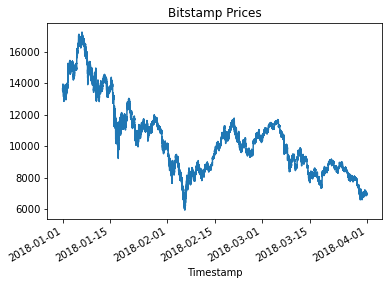

In [69]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
bitstamp["Close"].plot(title = "Bitstamp Prices")

<AxesSubplot:title={'center':'Coinbase Prices'}, xlabel='Timestamp'>

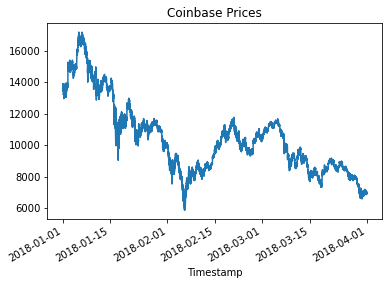

In [70]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
coinbase["Close"].plot(title = "Coinbase Prices")

<AxesSubplot:title={'center':'Bitstamp v, Coinbase'}, xlabel='Timestamp'>

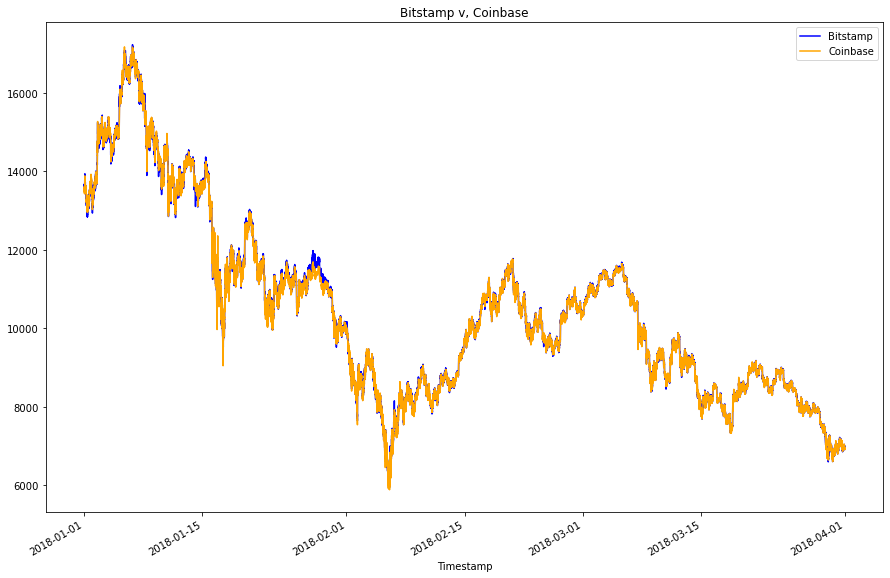

In [72]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp["Close"].plot(figsize = (15, 10), title = "Bitstamp v, Coinbase", color = "blue", label = "Bitstamp", legend = True)
coinbase["Close"].plot(figsize = (15, 10), color = "orange", label = "Coinbase", legend = True)

<AxesSubplot:title={'center':'Bitstamp v, Coinbase'}, xlabel='Timestamp'>

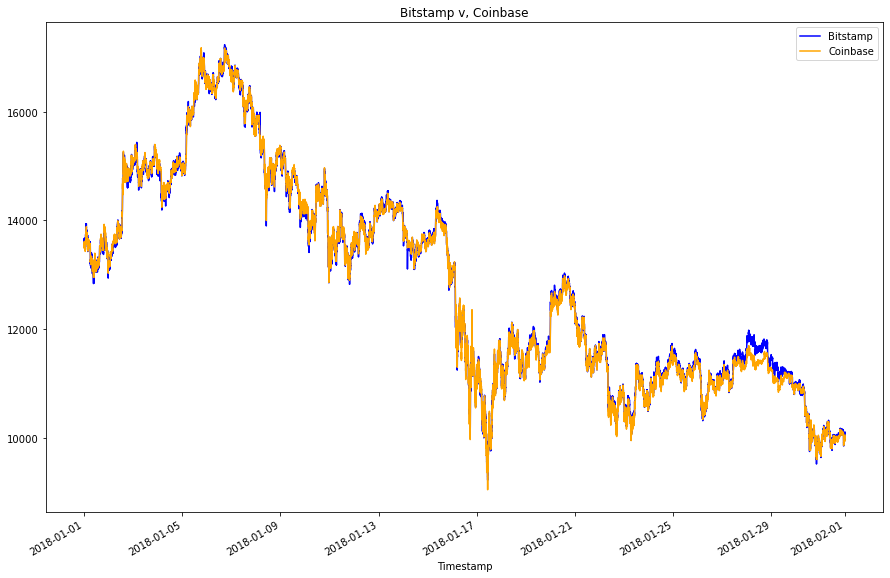

In [77]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp.loc["2018-01-01" : "2018-01-31", "Close"].plot(figsize = (15, 10), title = "Bitstamp v, Coinbase", color = "blue", label = "Bitstamp", legend = True)
coinbase.loc["2018-01-01" : "2018-01-31", "Close"].plot(figsize = (15, 10), color = "orange", label = "Coinbase", legend = True)

<AxesSubplot:title={'center':'Bitstamp v, Coinbase'}, xlabel='Timestamp'>

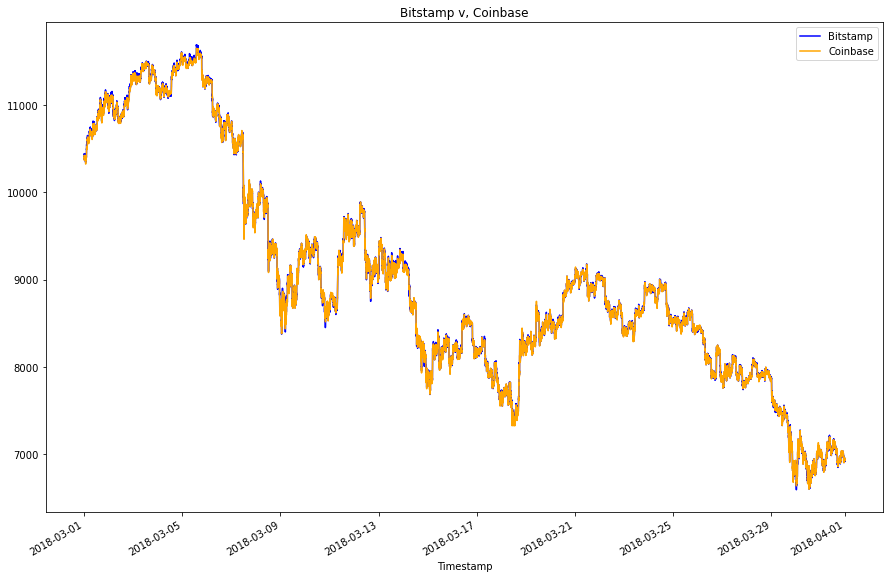

In [78]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
bitstamp.loc["2018-03-01" : "2018-03-31", "Close"].plot(figsize = (15, 10), title = "Bitstamp v, Coinbase", color = "blue", label = "Bitstamp", legend = True)
coinbase.loc["2018-03-01" : "2018-03-31", "Close"].plot(figsize = (15, 10), color = "orange", label = "Coinbase", legend = True)

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** Yes, the spread seemed to be getting tighter as time progressed. In January, there were days where the spread was significant, whereas in March, there seemed to be little to no point where the spread was large enough to be meaningful.

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

<AxesSubplot:title={'center':'January 25th, 2018'}, xlabel='Timestamp'>

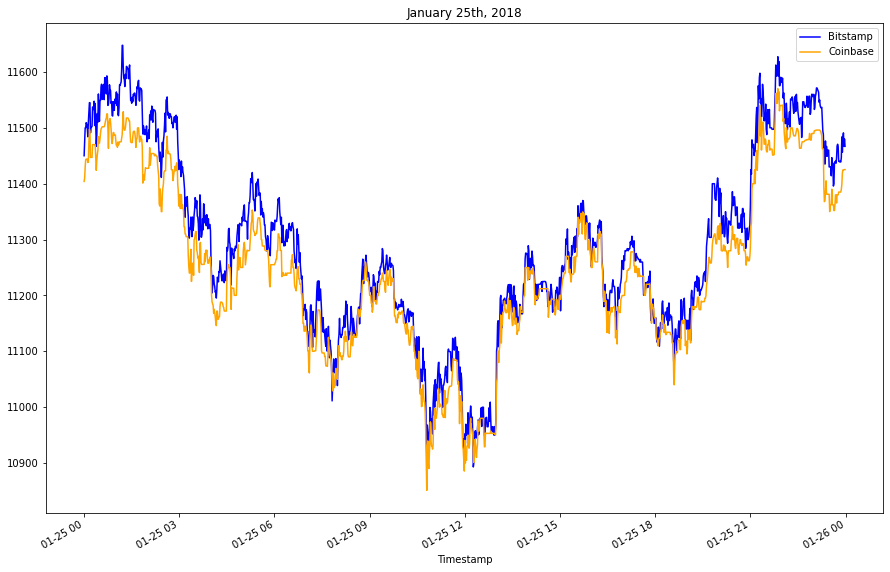

In [86]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp.loc["2018-01-25", "Close"].plot(figsize = (15, 10), title = "January 25th, 2018", color = "blue", label = "Bitstamp", legend = True)
coinbase.loc["2018-01-25", "Close"].plot(figsize = (15, 10), color = "orange", label = "Coinbase", legend = True)

In [93]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_early = bitstamp.loc["2018-01-25", "Close"] - coinbase.loc["2018-01-25", "Close"]

# Generate summary statistics for the early DataFrame
arbitrage_spread_early.describe()

count    1434.000000
mean       42.148703
std        26.257598
min       -33.370000
25%        22.720000
50%        41.305000
75%        61.220000
max       159.610000
Name: Close, dtype: float64

<AxesSubplot:>

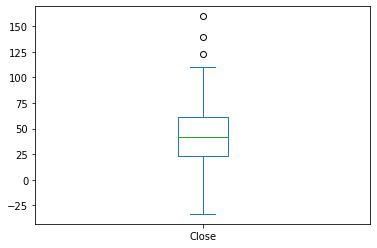

In [94]:
# Visualize the arbitrage spread from early in the dataset in a box plot
arbitrage_spread_early.plot(kind = "box")

<AxesSubplot:title={'center':'Febuary 24th, 2018'}, xlabel='Timestamp'>

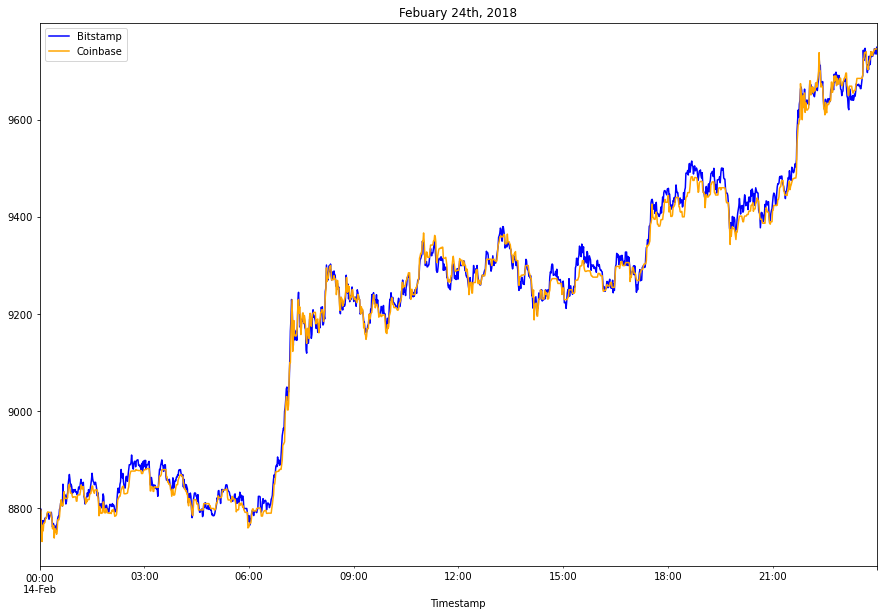

In [85]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp.loc["2018-02-14", "Close"].plot(figsize = (15, 10), title = "Febuary 24th, 2018", color = "blue", label = "Bitstamp", legend = True)
coinbase.loc["2018-02-14", "Close"].plot(figsize = (15, 10), color = "orange", label = "Coinbase", legend = True)

In [95]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = bitstamp.loc["2018-02-14", "Close"] - coinbase.loc["2018-02-14", "Close"]

# Generate summary statistics 
arbitrage_spread_middle.describe()

count    1440.000000
mean        6.716861
std        15.037548
min       -33.620000
25%        -3.637500
50%         7.080000
75%        17.012500
max        65.190000
Name: Close, dtype: float64

<AxesSubplot:>

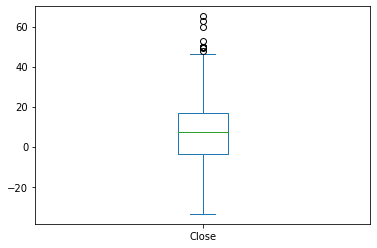

In [96]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
arbitrage_spread_middle.plot(kind = "box")

<AxesSubplot:title={'center':'March 30th, 2018'}, xlabel='Timestamp'>

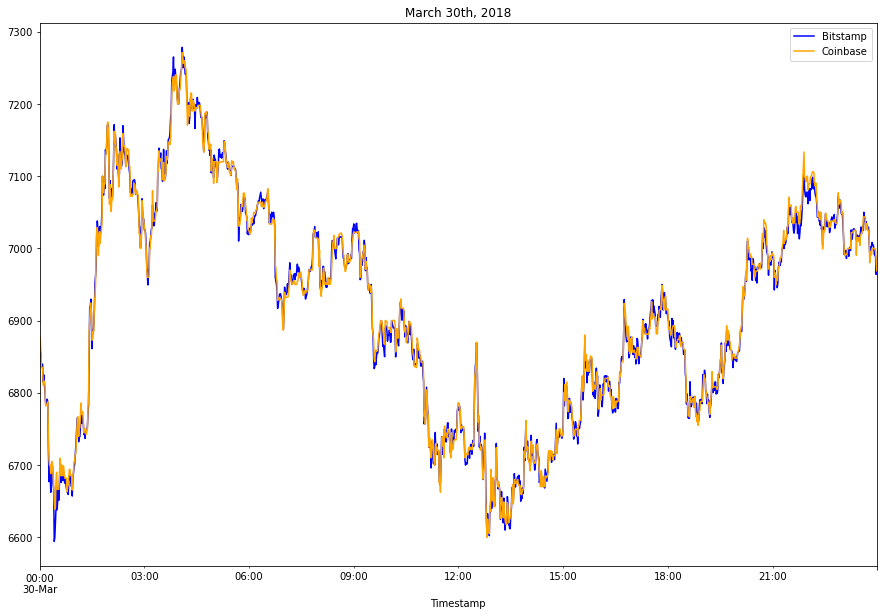

In [90]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp.loc["2018-03-30", "Close"].plot(figsize = (15, 10), title = "March 30th, 2018", color = "blue", label = "Bitstamp", legend = True)
coinbase.loc["2018-03-30", "Close"].plot(figsize = (15, 10), color = "orange", label = "Coinbase", legend = True)

In [97]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = bitstamp.loc["2018-03-30", "Close"] - coinbase.loc["2018-03-30", "Close"]

# Generate summary statistics for the late DataFrame
arbitrage_spread_late.describe()

count    1440.000000
mean       -1.419507
std         8.918465
min       -56.920000
25%        -6.640000
50%        -1.205000
75%         4.412500
max        30.000000
Name: Close, dtype: float64

<AxesSubplot:>

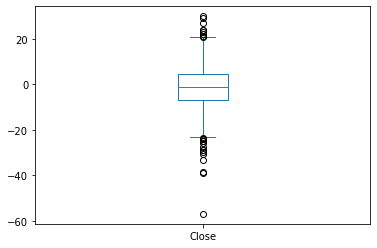

In [98]:
# Visualize the arbitrage spread from late in the dataset in a box plot
arbitrage_spread_late.plot(kind = "box")

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [99]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
# arbitrage_spread_early

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arbitrage_spread_early[arbitrage_spread_early > 0].describe()

count    1371.000000
mean       44.470481
std        24.401722
min         0.120000
25%        25.390000
50%        43.910000
75%        62.025000
max       159.610000
Name: Close, dtype: float64

In [106]:
# data for the middle date
# arbitrage_spread_middle

# summary statistics
arbitrage_spread_middle[arbitrage_spread_middle > 0].describe()

count    958.000000
mean      14.950010
std       10.482675
min        0.010000
25%        7.100000
50%       13.605000
75%       20.970000
max       65.190000
Name: Close, dtype: float64

In [108]:
# data for the late date
# arbitrage_spread_late

# summary statistics
arbitrage_spread_late[arbitrage_spread_late > 0].describe()

count    635.000000
mean       6.243102
std        5.034210
min        0.010000
25%        2.455000
50%        4.980000
75%        8.735000
max       30.000000
Name: Close, dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [109]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_early = arbitrage_spread_early / coinbase.loc["2018-01-25", "Close"]

# Review the spread return DataFrame
spread_return_early[spread_return_early > 0]

Timestamp
2018-01-25 00:00:00    0.004028
2018-01-25 00:01:00    0.005533
2018-01-25 00:02:00    0.006118
2018-01-25 00:03:00    0.005000
2018-01-25 00:04:00    0.005703
                         ...   
2018-01-25 23:55:00    0.005169
2018-01-25 23:56:00    0.005831
2018-01-25 23:57:00    0.003667
2018-01-25 23:58:00    0.004788
2018-01-25 23:59:00    0.003639
Name: Close, Length: 1371, dtype: float64

In [110]:
# calculate spread returns for middle date
spread_return_middle = arbitrage_spread_middle / coinbase.loc["2018-02-14", "Close"]

# review the dataframe
spread_return_middle[spread_return_middle > 0]

Timestamp
2018-02-14 00:02:00    0.000208
2018-02-14 00:04:00    0.003183
2018-02-14 00:05:00    0.001086
2018-02-14 00:06:00    0.001745
2018-02-14 00:07:00    0.000572
                         ...   
2018-02-14 23:44:00    0.001058
2018-02-14 23:46:00    0.001056
2018-02-14 23:55:00    0.000103
2018-02-14 23:56:00    0.000103
2018-02-14 23:59:00    0.000345
Name: Close, Length: 958, dtype: float64

In [111]:
# calculate spread returns for late date
spread_return_late = arbitrage_spread_late / coinbase.loc["2018-03-30", "Close"]

# review the dataframe
spread_return_late[spread_return_late > 0]

Timestamp
2018-03-30 00:03:00    0.000231
2018-03-30 00:04:00    0.000726
2018-03-30 00:05:00    0.000588
2018-03-30 00:06:00    0.000553
2018-03-30 00:07:00    0.001786
                         ...   
2018-03-30 23:51:00    0.001170
2018-03-30 23:52:00    0.000743
2018-03-30 23:53:00    0.000701
2018-03-30 23:54:00    0.000046
2018-03-30 23:59:00    0.001126
Name: Close, Length: 635, dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [112]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = spread_return_early[spread_return_early > 0.01]

# Review the first five profitable trades
profitable_trades_early.head()

Timestamp
2018-01-25 01:11:00    0.010727
2018-01-25 01:12:00    0.013894
2018-01-25 01:13:00    0.012150
Name: Close, dtype: float64

In [113]:
# determine the number of profitable trades (> 0.01) for the middle date dataset
profitable_trades_middle = spread_return_middle[spread_return_middle > 0.01]

# review the profitable trades
profitable_trades_middle.head()

Series([], Name: Close, dtype: float64)

In [114]:
# determine the number of profitable trades (> 0.01) for the late date dataset
profitable_trades_late = spread_return_late[spread_return_late > 0.01]

# review the profitable trades
profitable_trades_late.head()

Series([], Name: Close, dtype: float64)

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [118]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
spread_return_early.describe()

count    1434.000000
mean        0.003733
std         0.002308
min        -0.002970
25%         0.002028
50%         0.003659
75%         0.005423
max         0.013894
Name: Close, dtype: float64

In [119]:
# spread returns summary statistics for the middle date dataset
spread_return_middle.describe()

count    1440.000000
mean        0.000735
std         0.001626
min        -0.003596
25%        -0.000410
50%         0.000774
75%         0.001856
max         0.007164
Name: Close, dtype: float64

In [120]:
# spread returns summary statistics for the late date dataset
spread_return_late.describe()

count    1440.000000
mean       -0.000208
std         0.001291
min        -0.008558
25%        -0.000976
50%        -0.000178
75%         0.000637
max         0.004196
Name: Close, dtype: float64

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [123]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = spread_return_early[spread_return_early > 0.01] * coinbase.loc["2018-01-25", "Close"]

# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna()

# View the early profit DataFrame
profit_per_trade_early

Timestamp
2018-01-25 01:11:00    123.17
2018-01-25 01:12:00    159.61
2018-01-25 01:13:00    139.82
Name: Close, dtype: float64

In [124]:
# calculate profits for the middle date dataset
profit_middle = spread_return_middle[spread_return_middle > 0.01] * coinbase.loc["2018-02-14", "Close"]

# drop any missing values
profit_per_trade_middle = profit_middle.dropna()

# view the dataframe
profit_per_trade_middle

Series([], Name: Close, dtype: float64)

In [125]:
# calculate profits for the late date dataset
profit_late = spread_return_late[spread_return_late > 0.01] * coinbase.loc["2018-02-14", "Close"]

# drop any missing values
profit_per_trade_late = profit_late.dropna()

# view the dataframe
profit_per_trade_late

Series([], Name: Close, dtype: float64)

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [126]:
# Generate the summary statistics for the early profit per trade DataFrame
profit_per_trade_early.describe()

count      3.000000
mean     140.866667
std       18.242534
min      123.170000
25%      131.495000
50%      139.820000
75%      149.715000
max      159.610000
Name: Close, dtype: float64

<AxesSubplot:xlabel='Timestamp'>

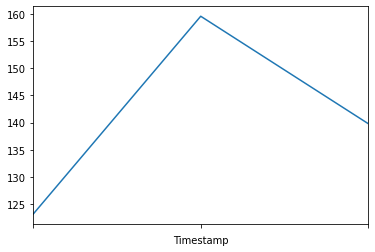

In [127]:
# Plot the results for the early profit per trade DataFrame
profit_per_trade_early.plot()

In [130]:
# statistic summary for middle date dataset
profit_per_trade_middle.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

<AxesSubplot:xlabel='Timestamp'>

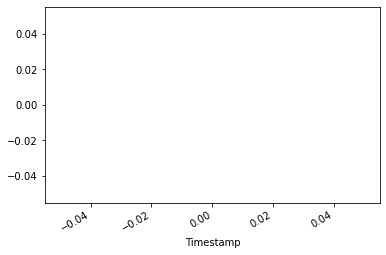

In [131]:
# plot the results for middle date dataset
profit_per_trade_middle.plot()

In [132]:
# statistic summary for late date dataset
profit_per_trade_late.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

<AxesSubplot:xlabel='Timestamp'>

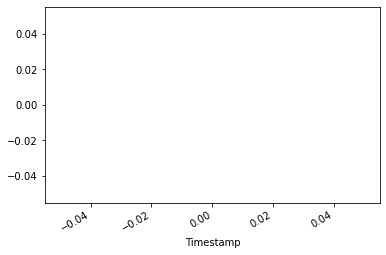

In [133]:
# plot the results for late date dataset
profit_per_trade_late.plot()

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [134]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
profit_per_trade_early.sum()

422.60000000000036

In [136]:
# potential profits for the middle date dataset
profit_per_trade_middle.sum()

0.0

In [137]:
# potential profits for the late date dataset
profit_per_trade_late.sum()

0.0

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [138]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_per_trade_early.cumsum()

<AxesSubplot:xlabel='Timestamp'>

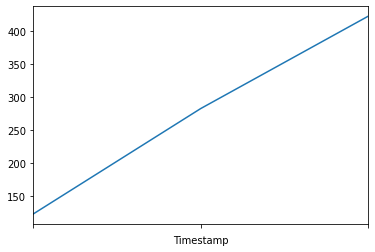

In [139]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_early.plot()

In [140]:
# calculate cumulative sum for middle date dataset
cumulative_profit_middle = profit_per_trade_middle.cumsum()

<AxesSubplot:xlabel='Timestamp'>

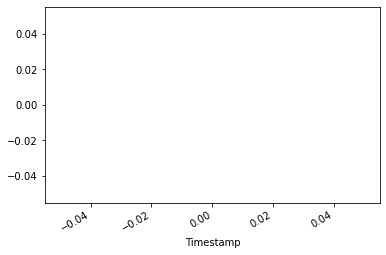

In [141]:
# plot the middle date cumulative profits
cumulative_profit_middle.plot()

In [ ]:
# calculate cumulative sum for late date dataset
cumulative_profit_late = profit_per_trade_middle.cumsum()

In [ ]:
# plot the late date cumulative profits
cumulative_profit_middle.plot()

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** YOUR ANSWER HERE